# Project 3 - Name Classifier
DATA 620 - Web Analytics \
Group: Tora Mullings, Coffy Andrews-Guo

In [212]:
import nltk
from nltk.corpus import names
from nltk.util import bigrams
import random
import pandas as pd
import seaborn as sns

# Data Exploration


In [213]:
names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
random.shuffle(names)

print(len(names), " names total")

name_list, genders, letter_counts = [], [], []
for (n, g) in names:
    letter_counts.append(len(n))
    name_list.append(n)
    if g == 'female':
        genders.append('female')
    else:
        genders.append('male')

dict = {'name': name_list,
        'gender': genders,
        'letter_count': letter_counts
       }
  
df = pd.DataFrame(dict)

print(genders.count('female'), "female names &", genders.count('male'), " male names")
names[:5]

7944  names total
5001 female names & 2943  male names


[('Antoine', 'male'),
 ('Daphene', 'female'),
 ('Rosalind', 'female'),
 ('Stanislaw', 'male'),
 ('Correna', 'female')]

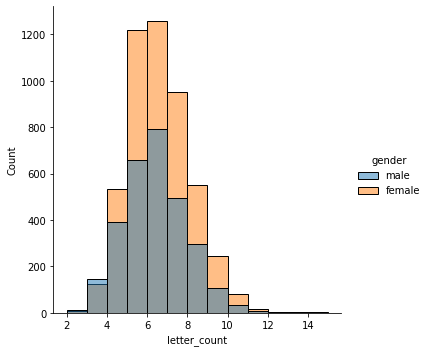

In [214]:
max_letters = df['letter_count'].max()
min_letters = df['letter_count'].min()
sns.displot(df, x="letter_count", hue="gender", binwidth=1)

Note that there are over 2000 more female names than male names.

In [215]:
df.loc[df['letter_count'] == max_letters]

,name,gender,letter_count
3867,Jean-Christophe,male,15
6351,Helen-Elizabeth,female,15


In [216]:
df.loc[df['letter_count'] == min_letters]

,name,gender,letter_count
167,Er,male,2
173,Hy,male,2
1049,Em,female,2
1461,Cy,male,2
1586,La,female,2
1927,Bo,male,2
2232,Ev,male,2
2442,Jo,female,2
2874,Di,female,2
3990,Ty,male,2


# Features
### From example classifier
* Last letter
* 1-letter suffix
* 2-letter suffix

### New features
* If present in cmudict, get bigrams in a list. Else, empty tuple ()
* Ratio of number of letters to number of syllables. If number of syllables is not available, ratio is -1.

# Training the Classifier
* Naive Bayes Classifier

### 1. Example classifier

In [217]:
def extract_features(name):
    features = {'last_letter': name[-1],
                'suffix1': name[-1:],
                'suffix2': name[-2:]}
    return features

In [218]:
train_names = names[:6900]
devtest_names = names[6900:7400]
test_names = names[7400:]

featuresets = [(extract_features(n), g) for (n,g) in names]
train_set, devtest_set, test_set = featuresets[:6900], featuresets[6900:7400], featuresets[7400:]

classifier = nltk.classify.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, devtest_set))

0.778


### 2. Add bigram feature

In [219]:
prondict =  nltk.corpus.cmudict.dict()
def extract_features(name):
    features = {'last_letter': name[-1],
                'suffix1': name[-1:],
                'suffix2': name[-2:]}
    
    grams = ()

    try:
        grams = tuple(bigrams(prondict[name.lower()][0]))

    except:
        grams = ()

    features['grams'] = grams

    return features
    

In [220]:
train_names = names[:6900]
devtest_names = names[6900:7400]
test_names = names[7400:]

featuresets = [(extract_features(n), g) for (n,g) in names]
train_set, devtest_set, test_set = featuresets[:6900], featuresets[6900:7400], featuresets[7400:]

classifier = nltk.classify.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, devtest_set))

0.804


### 3. Add ratio feature

In [221]:
def extract_features(name):
    features = {'last_letter': name[-1],
                'suffix1': name[-1:],
                'suffix2': name[-2:]}
    
    grams = ()
    syllables = -1
    try:
        grams = tuple(bigrams(prondict[name.lower()][0]))
        syllables = len(prondict[name.lower()])
    except:
        grams = ()

    features['grams'] = grams
    features['letter_syb_ratio'] = -1 if syllables == -1 else (len(name) / syllables)

    return features
    

In [222]:
train_names = names[:6900]
devtest_names = names[6900:7400]
test_names = names[7400:]

featuresets = [(extract_features(n), g) for (n,g) in names]
train_set, devtest_set, test_set = featuresets[:6900], featuresets[6900:7400], featuresets[7400:]

classifier = nltk.classify.NaiveBayesClassifier.train(train_set)

print(nltk.classify.accuracy(classifier, devtest_set))

0.812


# Testing the Classifier

In [223]:
print(nltk.classify.accuracy(classifier, test_set))

0.7941176470588235


In [224]:
classifier.show_most_informative_features(5)

Most Informative Features
                 suffix2 = 'na'           female : male   =     93.4 : 1.0
                 suffix2 = 'la'           female : male   =     71.9 : 1.0
                 suffix2 = 'ia'           female : male   =     36.5 : 1.0
             last_letter = 'a'            female : male   =     34.6 : 1.0
                 suffix1 = 'a'            female : male   =     34.6 : 1.0


# Errors
These are the names that were misclassified.

In [225]:
errors = []
for (name, tag) in test_names:
    guess = classifier.classify(extract_features(name))
    if guess != tag:
        errors.append( (tag, guess, name) )

for (tag, guess, name) in sorted(errors): # doctest: +ELLIPSIS +NORMALIZE_WHITESPACE
    print('correct=%-8s guess=%-8s name=%-30s' %
(tag, guess, name))

correct=female   guess=male     name=Adelind                       
correct=female   guess=male     name=Amber                         
correct=female   guess=male     name=Amity                         
correct=female   guess=male     name=Ann                           
correct=female   guess=male     name=Ariel                         
correct=female   guess=male     name=Avis                          
correct=female   guess=male     name=Benny                         
correct=female   guess=male     name=Berget                        
correct=female   guess=male     name=Biddy                         
correct=female   guess=male     name=Blake                         
correct=female   guess=male     name=Bridget                       
correct=female   guess=male     name=Calypso                       
correct=female   guess=male     name=Cameo                         
correct=female   guess=male     name=Carmon                        
correct=female   guess=male     name=Cecil      

The devtest set had an accuracy of 81% and the test set had an accuracy of 79%. There isn't much of a difference, as expected. These sets are disjoint.